In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding

from tensorflow.keras.models import Model

In [5]:
# you can import this from kaggle

In [6]:
#data processing

In [7]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# rename columns to something better
df.columns = ['labels', 'data']

In [12]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df["label_numerics"]= df["labels"].map({"ham":0, "spam":1})
Y = df["label_numerics"].values

In [18]:
df

,labels,data,label_numerics,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,1
5568,ham,Will Ì_ b going to esplanade fr home?,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,0
5570,ham,The guy did some bitching but I acted like i'd...,0,0


In [19]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [20]:
#TRAIN TEST SPLIT

In [21]:
df_train, df_test,Ytrain, Ytest= train_test_split(df['data'], Y, test_size=0.33)

In [22]:
max_words=20000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_train)

In [23]:
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test= tokenizer.texts_to_sequences(df_test)

In [24]:
sequences_train

[[43,
  123,
  394,
  52,
  655,
  2268,
  2269,
  185,
  2270,
  2271,
  418,
  3468,
  3469,
  186,
  3470,
  3471,
  3472,
  2272],
 [117, 292, 292, 1, 574, 81],
 [115, 29, 3, 80, 2, 48, 2, 35, 14],
 [3473, 1, 80, 2, 89, 3474, 1247],
 [2273,
  1779,
  22,
  2274,
  36,
  2275,
  1465,
  5,
  2276,
  124,
  83,
  575,
  1465,
  5,
  2276,
  1100,
  1,
  83,
  74,
  2,
  1466,
  4,
  378,
  232],
 [1,
  1780,
  131,
  443,
  18,
  126,
  6,
  3475,
  22,
  490,
  1,
  187,
  269,
  444,
  6,
  576,
  162,
  1248],
 [166, 4, 307, 161, 153, 26, 4, 153, 577, 702],
 [1,
  68,
  3,
  3,
  758,
  11,
  3476,
  19,
  2277,
  14,
  9,
  25,
  38,
  4,
  3477,
  24,
  14,
  9,
  4,
  2278,
  4,
  308,
  3478,
  2278,
  3479],
 [53,
  21,
  3,
  159,
  8,
  2279,
  93,
  24,
  94,
  370,
  33,
  8,
  395,
  71,
  2280,
  14,
  1781,
  278,
  325,
  30,
  827,
  49,
  29,
  3,
  7,
  3480,
  3481],
 [1249, 1250, 26, 16, 3, 332],
 [117, 96, 154, 3, 57, 333, 56, 656, 46],
 [35, 5, 1251, 31, 104],


In [25]:
sequences_test

[[47, 260, 275],
 [23,
  281,
  254,
  1523,
  2,
  33,
  253,
  30,
  186,
  1832,
  24,
  64,
  164,
  301,
  36,
  3616,
  253,
  2,
  3,
  846,
  13,
  190,
  1832,
  3617,
  176,
  846,
  181,
  1024,
  4093],
 [90,
  1589,
  6146,
  6,
  380,
  1426,
  2,
  2673,
  862,
  8,
  12,
  5,
  6148,
  3,
  128,
  2,
  129,
  45,
  43,
  86,
  28,
  129,
  2,
  40,
  123,
  18,
  89,
  72,
  89],
 [1,
  68,
  292,
  130,
  24,
  297,
  7,
  2014,
  13,
  205,
  355,
  167,
  4370,
  183,
  2286,
  19,
  10,
  34,
  66,
  832],
 [209,
  279,
  16,
  125,
  147,
  10,
  4,
  17,
  34,
  66,
  2764,
  53,
  66,
  493,
  26,
  118,
  100,
  896],
 [242, 45, 11, 412, 490, 18, 369, 73, 6, 489, 82, 504, 159, 32, 2765],
 [4,
  482,
  1676,
  149,
  95,
  345,
  196,
  522,
  604,
  135,
  64,
  97,
  272,
  24,
  472,
  9,
  79,
  23,
  1,
  732,
  338,
  138,
  1,
  83,
  1171],
 [107, 112, 3, 515, 2, 3177, 84, 285],
 [156, 14, 3, 111, 3715, 14, 63, 226, 28, 4, 146, 55, 612],
 [2889, 328, 3166

In [26]:
tokenizer.word_docs

defaultdict(int,
            {'wml': 2,
             'id': 20,
             '37819': 1,
             'jul': 1,
             '1b6a5ecef91ff9': 1,
             'ringtone': 19,
             'tms': 2,
             'free': 161,
             'true18': 1,
             '0430': 1,
             '05': 2,
             'http': 12,
             'first': 47,
             'widelive': 2,
             'com': 48,
             'from': 177,
             'msg': 72,
             'index': 2,
             'ya': 28,
             'oh': 74,
             'remember': 14,
             'i': 1137,
             'da': 95,
             'need': 106,
             'do': 233,
             'where': 75,
             'go': 178,
             'get': 238,
             'it': 352,
             'you': 1042,
             'to': 1117,
             'sleepin': 1,
             'sup': 5,
             'fuuuuck': 1,
             'stop': 89,
             'will': 234,
             'want': 110,
             'please': 74,
             'bcoz': 6,


In [27]:
V= len(tokenizer.word_docs) # NO OF UNIQUE TOKENS
V

7210

In [28]:
#Pad TRAIN DATA sequences with max length T 

In [29]:
data_train = pad_sequences(sequences_train)

In [30]:
data_train

array([[   0,    0,    0, ..., 3471, 3472, 2272],
       [   0,    0,    0, ...,    1,  574,   81],
       [   0,    0,    0, ...,    2,   35,   14],
       ...,
       [   0,    0,    0, ...,    9,  110,  568],
       [   0,    0,    0, ...,  558,   26,  136],
       [   0,    0,    0, ...,    2,   29, 1032]], dtype=int32)

In [31]:
data_train.shape

(3733, 162)

In [32]:
T= data_train.shape[1]

In [33]:
T

162

In [34]:
#Pad TEST DATA sequences with max length T

In [35]:
data_test = pad_sequences(sequences_test, maxlen=T)


In [36]:
data_test

array([[   0,    0,    0, ...,   47,  260,  275],
       [   0,    0,    0, ...,  181, 1024, 4093],
       [   0,    0,    0, ...,   89,   72,   89],
       ...,
       [   0,    0,    0, ...,   48,  338,   62],
       [   0,    0,    0, ...,  135,  282,  211],
       [   0,    0,    0, ..., 1075, 1496, 1151]], dtype=int32)

In [37]:
data_train.shape

(3733, 162)

In [38]:
data_test.shape

(1839, 162)

In [39]:
data_train.shape[1]

162

In [42]:
V= len(tokenizer.word_docs)
T = data_train.shape[1] #features

In [43]:
 #TF SHAPES
#   2000(word_embeddings) x D(just choose dimensions)x  T 162(features)

In [44]:
#THIS IS THE CHANGE FROM RNN

In [46]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding

In [47]:
D=20
#V is full length of the word vector
#T is number of features

i=Input(shape=(T,))

x=Embedding(V+1,D)(i)
print(x)

x=Conv1D(32,3,activation="relu")(x)  #these are industry best numbers from papers
print(x)

x=MaxPooling1D(3)(x)#uses max pooling to reduce information to max 
print(x)

x=Conv1D(64,3,activation="relu")(x)  #these are industry best numbers from papers
print(x)

x=MaxPooling1D(3)(x)#uses max pooling to reduce information to max 
print(x)

x=Conv1D(128,3,activation="relu")(x)  #these are industry best numbers from papers
print(x)

x=MaxPooling1D(3)(x)#uses max pooling to reduce information to max 
print(x)

#Final output with 1 output 1 hence sigmoid
x=Dense(1, activation="sigmoid")(x)
print(x)

model = Model(i,x)


Tensor("embedding_1/embedding_lookup/Identity_1:0", shape=(None, 162, 20), dtype=float32)
Tensor("conv1d/Relu:0", shape=(None, 160, 32), dtype=float32)
Tensor("max_pooling1d/Squeeze:0", shape=(None, 53, 32), dtype=float32)
Tensor("conv1d_1/Relu:0", shape=(None, 51, 64), dtype=float32)
Tensor("max_pooling1d_1/Squeeze:0", shape=(None, 17, 64), dtype=float32)
Tensor("conv1d_2/Relu:0", shape=(None, 15, 128), dtype=float32)
Tensor("max_pooling1d_2/Squeeze:0", shape=(None, 5, 128), dtype=float32)
Tensor("dense/Sigmoid:0", shape=(None, 5, 1), dtype=float32)


In [48]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 162)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 162, 20)           144220    
_________________________________________________________________
conv1d (Conv1D)              (None, 160, 32)           1952      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 53, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 51, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 17, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 128)          

In [50]:
#COMPILE THE MODEL

In [72]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 2s 18ms/step - loss: 0.2958 - accuracy: 0.9026 - val_loss: 0.3641 - val_accuracy: 0.8849
Epoch 2/10
117/117 [==============================] - 2s 20ms/step - loss: 0.2940 - accuracy: 0.9026 - val_loss: 0.3568 - val_accuracy: 0.8850
Epoch 3/10
117/117 [==============================] - 2s 16ms/step - loss: 0.2946 - accuracy: 0.9027 - val_loss: 0.3594 - val_accuracy: 0.8844
Epoch 4/10
117/117 [==============================] - 2s 16ms/step - loss: 0.2951 - accuracy: 0.9025 - val_loss: 0.3577 - val_accuracy: 0.8852
Epoch 5/10
117/117 [==============================] - 2s 21ms/step - loss: 0.2957 - accuracy: 0.9026 - val_loss: 0.3674 - val_accuracy: 0.8848
Epoch 6/10
117/117 [==============================] - 2s 19ms/step - loss: 0.2945 - accuracy: 0.9027 - val_loss: 0.3653 - val_accuracy: 0.8846
Epoch 7/10
117/117 [==============================] - 2s 18ms/step - loss: 0.2932 - accuracy: 0.9025 - val_loss: 0.3647 - va

In [52]:
import matplotlib.pyplot as plt

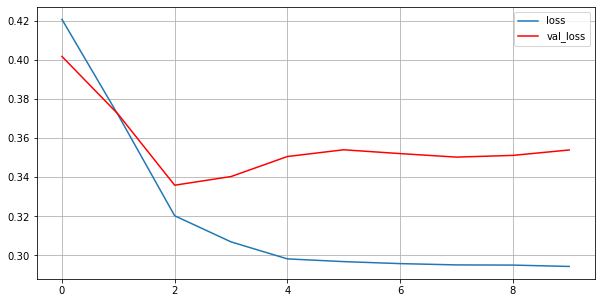

In [53]:
plt.figure(figsize=(10,5))


plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss' , color="red")
plt.grid()
plt.legend()

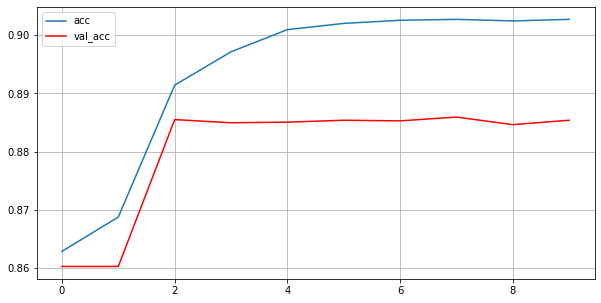

In [54]:
plt.figure(figsize=(10,5))

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc',color="red")
plt.grid()
plt.legend()

In [55]:
#LETS PREDICT IT .. FUN PART

In [56]:
#Reset the index in test data

In [98]:
df_test

2726       No i am not having not any movies in my laptop
1804                        The bus leaves at  &lt;#&gt; 
3034    Raji..pls do me a favour. Pls convey my Birthd...
2380    If i let you do this, i want you in the house ...
977     Dont hesitate. You know this is the second tim...
                              ...                        
2529    Can you just come in for a sec? There's somebo...
1496    I'm always on yahoo messenger now. Just send t...
1885    I think asking for a gym is the excuse for laz...
3915                                        Ok. C u then.
516     Boltblue tones for 150p Reply POLY# or MONO# e...
Name: data, Length: 1839, dtype: object

In [57]:
df_test2=df_test.reset_index()

In [58]:
df_test2=df_test2.drop(columns=["index"])

In [59]:
df_test2.shape

(1839, 1)

In [60]:
#exploration

In [88]:
df_test2.loc[1838]

data    I sent my scores to sophas and i had to do sec...
Name: 1838, dtype: object

In [89]:
df_test2.loc[1838][0]

'I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones'

In [63]:
Ytest.shape

(1839,)

In [64]:
Ytest[1838]

0

In [65]:
#indexes for all the spam

In [66]:
np.where(Ytest==1)

(array([   2,   33,   81,   86,   88,  121,  124,  130,  134,  147,  148,
         150,  176,  180,  182,  189,  190,  194,  212,  220,  223,  226,
         227,  253,  255,  273,  279,  292,  293,  300,  302,  312,  314,
         319,  336,  339,  350,  351,  354,  355,  364,  385,  388,  397,
         403,  405,  407,  409,  414,  425,  427,  429,  430,  444,  447,
         449,  451,  455,  484,  498,  502,  510,  514,  519,  520,  529,
         535,  549,  556,  562,  566,  567,  568,  570,  576,  582,  594,
         606,  608,  614,  616,  629,  660,  661,  663,  667,  671,  697,
         700,  710,  716,  718,  720,  721,  742,  759,  764,  765,  778,
         793,  794,  797,  799,  812,  823,  839,  841,  845,  856,  871,
         872,  880,  884,  887,  893,  896,  902,  911,  916,  948,  949,
         952,  955,  979,  989,  996,  998, 1019, 1020, 1025, 1037, 1045,
        1047, 1049, 1054, 1055, 1068, 1070, 1072, 1076, 1081, 1084, 1086,
        1093, 1101, 1102, 1105, 1106, 

In [90]:
Ytest[1838]

0

In [78]:
df_test2.loc[1]

data    So many people seems to be special at first si...
Name: 1, dtype: object

In [91]:
k=pad_sequences(tokenizer.texts_to_sequences(df_test2.loc[1838]),maxlen=162)

In [92]:
p=model.predict(k)

In [93]:
max(p.flatten())

0.15734133

In [94]:
round(max(p.flatten()))

0.0

In [ ]:
#LETS TRY ANOTHER

In [96]:
Ytest[1826]

1

In [97]:
[df_test2.loc[1826][0]]

['U are subscribed to the best Mobile Content Service in the UK for å£3 per 10 days until you send STOP to 82324. Helpline 08706091795']

In [98]:
test_token=pad_sequences(tokenizer.texts_to_sequences([df_test2.loc[1826][0]]),maxlen=162)

In [99]:
model.predict(test_token)

array([[[0.15734133],
        [0.15734133],
        [0.15734133],
        [0.15734133],
        [0.9996983 ]]], dtype=float32)

In [ ]:
p=model.predict(test_token)

In [145]:
# LETS TRY WITH OUT OWN TEXT

In [321]:
test="Of course we’ve knocked down our prices for Boxing Week! Boxing glove Save big on games, accessories, and more: https://bit.ly/3mIvsRT"

In [322]:
test_Series=pd.Series(test)

In [323]:
k=pad_sequences(tokenizer.texts_to_sequences(test_Series),maxlen=162)

In [324]:
model.predict(k)

array([[0.00298834]], dtype=float32)

In [277]:
k

array([[  0,   0,   0, ...,   0,   0, 818],
       [  0,   0,   0, ...,   0,   0,  78],
       [  0,   0,   0, ...,   0,   0, 160],
       ...,
       [  0,   0,   0, ...,   0,   0, 216],
       [  0,   0,   0, ...,   0,   0, 845],
       [  0,   0,   0, ...,   0,   0,  80]], dtype=int32)